In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

Lets read and view the data

In [2]:
df = pd.read_csv("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv")

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In the above dataset we have many coloumns that are not relevant or might not be of much use for our prediction so we will have a new data set which will have only listed coloumns that will be used for prediction

Lets select some features that we want to use for regression.

In [3]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


lets check the data type 

In [4]:
cdf.dtypes

ENGINESIZE              float64
CYLINDERS                 int64
FUELCONSUMPTION_CITY    float64
FUELCONSUMPTION_HWY     float64
FUELCONSUMPTION_COMB    float64
CO2EMISSIONS              int64
dtype: object

In [6]:
# At the same time you can check with below syntex as well where you can see the sum of missing values available into data
cdf.isnull().sum()

ENGINESIZE              0
CYLINDERS               0
FUELCONSUMPTION_CITY    0
FUELCONSUMPTION_HWY     0
FUELCONSUMPTION_COMB    0
CO2EMISSIONS            0
dtype: int64

Lets get the graph of each of the coloumns in cdf

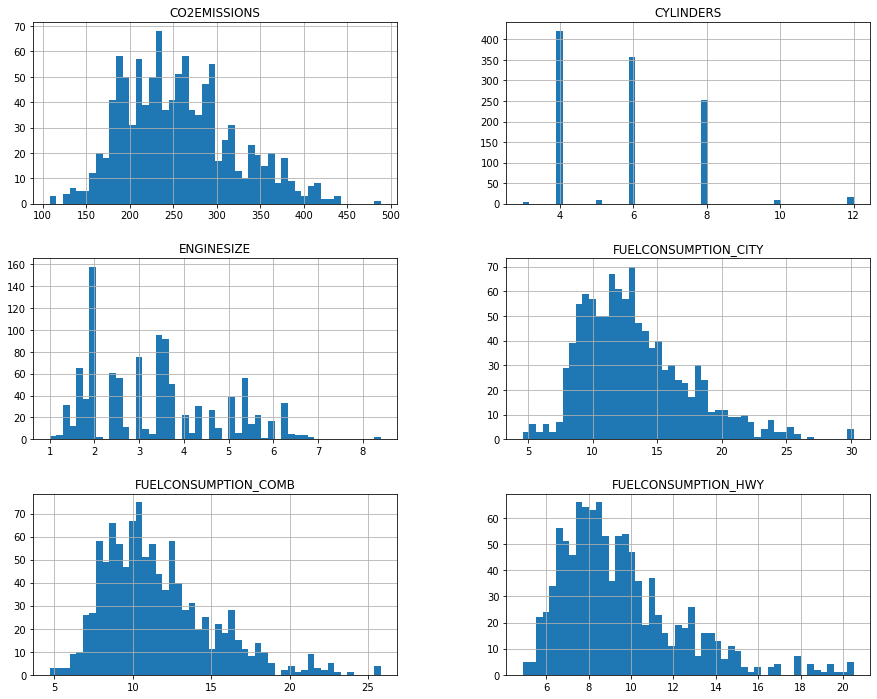

In [9]:
cdf.hist(bins=50,figsize=(15,12))
plt.show()

Time for train and test  the data. This is the most popular approach in machine learning algorithm where we first train our model with a limited data and then use the train data to test the data to attain the prediction.It is more realistic for real world problems.

In reality there are multiple factor that can affect the CO2 emission.This process of predicting one varible with one or more independent variable is called as Multile regression

In [13]:
from sklearn import linear_model
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[11.006304    7.81956433  9.35096628]]


random.rand(len(df)) is an array of size len(df) with randomly and uniformly distributed float values in range [0, 1]. The < 0.8 applies the comparison element-wise and stores the result in place. Thus values < 0.8 become True and value >= 0.8 become False 

Coefficient and Intercept are two parameters which can help to estimate a fit line.

# Prediction

Let's test our model on the data

In [14]:
y_hat= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 548.70
Variance score: 0.85


In the above code we are testing our data with the same parameter used for train. Residual sum of squares (RSS), also known as the sum of squared residuals (SSR) or the sum of squared estimate of errors (SSE).

RSS is the sum of the squared differences between the actual Y and the predicted Y.The lesser the RSS the better is the fit.The more the value the poor is the model. A perfect value for RSS is 0. One of the major usage of RSS is to predict the value of R2.

Variance score:
If Y_hat is the estimated target output, y the corresponding target output, and Var is Variance, the square of the standard deviation, then the explained variance is estimated as follow:

𝚅𝚊𝚛𝚒𝚊𝚗𝚌𝚎(𝑦,Y_hat )=1−(𝑉𝑎𝑟{𝑦−Y_hat }/𝑉𝑎𝑟{𝑦})

In our case the variance Score is 0.85 which can be considered as a good value.

Lets see how fit is our model through graph

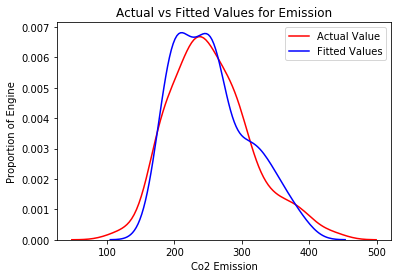

In [21]:
import seaborn as sns

ax2 = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_hat, hist=False, color="b", label="Fitted Values" , ax=ax2)

plt.title('Actual vs Fitted Values for Emission')
plt.xlabel('Co2 Emission')
plt.ylabel('Proportion of Engine')

plt.show()
plt.close()
